Mini Projeto - Ciência dos Dados

Vinicius Bonelli Falco - 2B

Variável utilizada: número de infrações de sinal vermelho em Chicago

Link: https://data.cityofchicago.org/Transportation/Red-Light-Camera-Violations/spqx-js37

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import math
from scipy import stats

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vinicius Bonelli\Desktop


In [3]:
dados = pd.read_csv('Red_Light_Camera_Violations.csv', sep = ",")


In [4]:
dados["Violações"] = dados.VIOLATIONS
violacoes = pd.Series(data=dados.Violações)
print(violacoes.describe())

count    214848.000000
mean          5.468671
std           6.739297
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         145.000000
Name: Violações, dtype: float64


In [5]:
faixa_violacoes = range(0,146,1)
faixa_violacoes1 = range(0,51,1)
corte_violacoes = pd.cut(dados.Violações, faixa_violacoes)
corte_violacoes1 = pd.cut(dados.Violações, faixa_violacoes1)
frequencia_violacoes = corte_violacoes.value_counts()
frequencia_violacoes1 = corte_violacoes1.value_counts()

Gerando histograma dos dados:

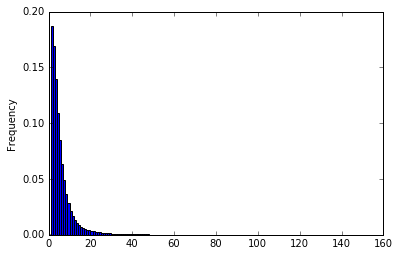

In [6]:
plot1 = dados.Violações.plot.hist(bins = faixa_violacoes, normed = 1)

Assimetria Positiva: Moda < Mediana < Media
Possíveis distribuições: Gamma, Exponencial
Em geral, escolhi todas as distribuições baseadas em quais geravam gráficos similares ao que conseguimos com os dados de infrações de sinal vermelho. Das duas opções escolhidas a que mais faz sentido é a exponencial pois a taxa de variação no começo é muito acentuada e o gráfico tende a zero por um longo período.

Estimando parâmetros para as distribuições escolhidas:

In [25]:
mu_exp = violacoes.mean()

k_gamma = 1.5

theta_gamma = violacoes.mean()/k_gamma

x = []
for i in range(0,51):
    x.append(i)

exponencial = stats.expon.pdf(x, loc =0, scale=mu_exp)
gamma = stats.gamma.pdf(x, scale=theta_gamma, loc=0, a=k_gamma)

Plotando o gráfico dos dados com as distribuições escolhidas. Escala ampliada para melhorar vizualização.

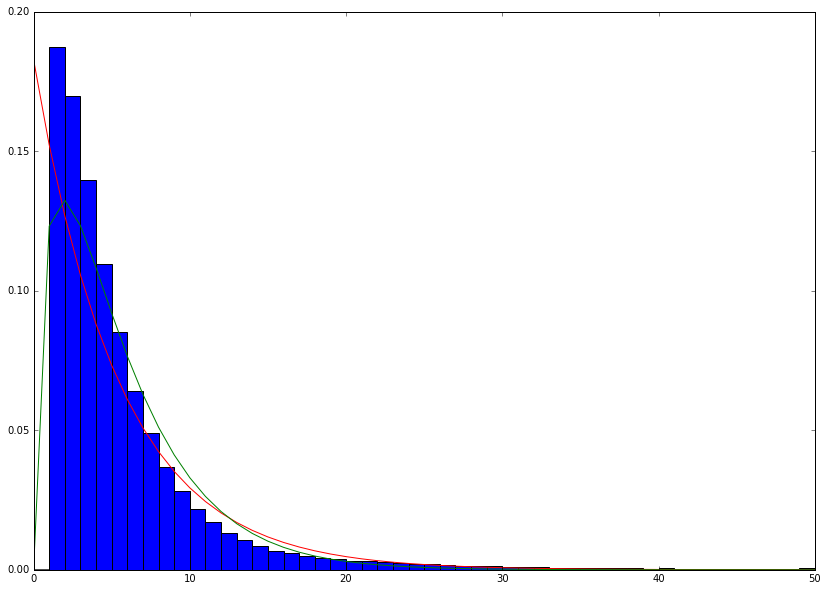

In [26]:
plt.figure(figsize=(14,10))
plt.hist(dados.Violações, bins = faixa_violacoes1, normed = 1)
plt.plot(x, exponencial, '-', color='red', label="Exponencial")
plt.plot(x, gamma, '-', color='green', label="Gamma")
plt.show()

Gerando o Q-Q Plot que permite comparar os dados reais com os da distribuição:

In [27]:
fra = [] 
for i in range(len(violacoes)):
    acc = (i - 0.5) / len(violacoes)
    if acc < 0:
        acc = 0
    fra.append(acc)
    
fra = pd.Series(data=fra)

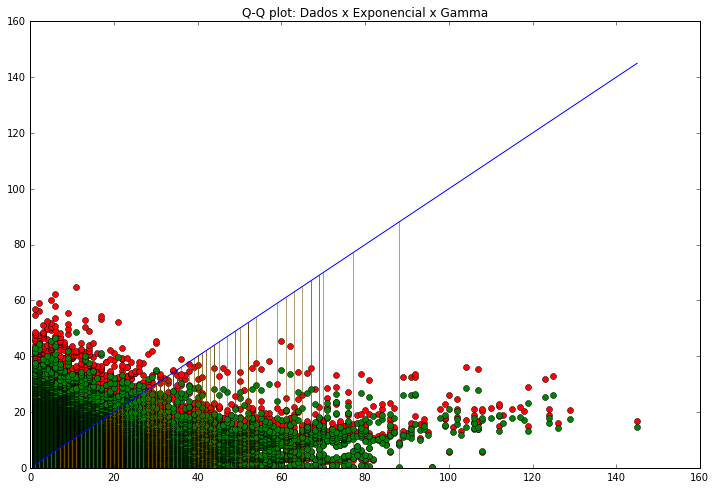

In [28]:
q_exp = stats.expon.ppf(fra, scale=mu_exp) 
q_gamma = stats.gamma.ppf(fra, scale=theta_gamma, loc=0, a=k_gamma)

plt.figure(figsize=(12,8))
plt.title("Q-Q plot: Dados x Exponencial x Gamma")

exp_plot = plt.plot(violacoes, q_exp, 'o', color="red", label="Exponencial")
gamma_plot = plt.plot(violacoes, q_gamma, 'o', color="green", label = "Gamma")


plt.plot((min(violacoes), max(violacoes)), (min(violacoes), max(violacoes)), '-')

for i in range(0,5001):
    plt.plot((violacoes[i], violacoes[i]), (q_exp[i], violacoes[i]), '-', color='red', alpha=0.3  )
    plt.plot((violacoes[i], violacoes[i]), (q_gamma[i], violacoes[i]), '-', color='green', alpha=0.3  )

plt.show()

Como a base de dados era muito grande (215000) tive que limitar o range no código acima pois o meu computador não conseguia gerar esse gráfico.

Calculando o erro quadrático:

In [29]:
erro_quadratico_exponencial = sum((violacoes - q_exp)**2)
erro_quadratico_gamma = sum((violacoes - q_gamma)**2)

print("Erro quadrático da exponencial :{:4.3f}\n".format(erro_quadratico_exponencial))
print("Erro quadrático da gamma :{:4.3f}\n".format(erro_quadratico_gamma))

Erro quadrático da exponencial :14340963.859

Erro quadrático da gamma :12565227.355



Com estes dados podemos assumir que utilizandos os parâmetros definidos acima a distribuição gamma corresponde melhor aos dados reais

Calculando o erro quadrático médio:

In [30]:
eqm_exp = erro_quadratico_exponencial/len(violacoes)
eqm_gamma = erro_quadratico_gamma/len(violacoes)

print("Erro quadratico médio da exponencial :", eqm_exp)
print("Erro quadratico médio da gamma :", eqm_gamma)

Erro quadratico médio da exponencial : 66.749347718
Erro quadratico médio da gamma : 58.4842649476


Com estes dados podemos assumir que utilizandos os parâmetros definidos acima a distribuição gamma corresponde melhor aos dados reais

Calculando a soma das diferenças:

In [31]:
soma_diferenças_exponencial = sum(abs(violacoes - q_exp))
soma_diferenças_gamma = sum(abs(violacoes - q_gamma))

print("Soma de diferenças da exponencial :", soma_diferenças_exponencial)
print("Soma de diferenças da gamma :", soma_diferenças_gamma)

Soma de diferenças da exponencial : 1103247.13862
Soma de diferenças da gamma : 1025477.81479


Com estes dados podemos assumir que utilizandos os parâmetros definidos acima a distribuição gamma corresponde melhor aos dados reais

Gerando os gráficos das funções cumulativas:

In [32]:
cdf_exponencial = stats.expon.cdf(violacoes, scale=mu_exp) 
cdf_gamma = stats.gamma.cdf(violacoes, scale=theta_gamma, loc=0, a=k_gamma)


"""plt.figure(figsize=(12,8))

plt.title("Cumulativa: Dados x Exponencial x Gamma")

dados_fra_plot = plt.plot(violacoes, fra, '-', color='black', label="F.R.A dos dados")
cdf_exp_plot   = plt.plot(violacoes, cdf_exponencial, '-', color='red', label = "Cumulativa da exponencial")
cdf_gamma_plot = plt.plot(violacoes, cdf_gamma, '-', color='green', label = "Cumulativa da distribuição Gamma")


for i in range(0,5):
    plt.plot((violacoes[i], violacoes[i]), (fra[i], cdf_exponencial[i]), ':', color="red", alpha=0.3)
    plt.plot((violacoes[i], violacoes[i]), (fra[i], cdf_gamma[i]), '--', color="green", alpha=0.3)
    
plt.show()"""

'plt.figure(figsize=(12,8))\n\nplt.title("Cumulativa: Dados x Exponencial x Gamma")\n\ndados_fra_plot = plt.plot(violacoes, fra, \'-\', color=\'black\', label="F.R.A dos dados")\ncdf_exp_plot   = plt.plot(violacoes, cdf_exponencial, \'-\', color=\'red\', label = "Cumulativa da exponencial")\ncdf_gamma_plot = plt.plot(violacoes, cdf_gamma, \'-\', color=\'green\', label = "Cumulativa da distribuição Gamma")\n\n\nfor i in range(0,5):\n    plt.plot((violacoes[i], violacoes[i]), (fra[i], cdf_exponencial[i]), \':\', color="red", alpha=0.3)\n    plt.plot((violacoes[i], violacoes[i]), (fra[i], cdf_gamma[i]), \'--\', color="green", alpha=0.3)\n    \nplt.show()'

Não foi possível gerar esse gráfico novamente por causa do tamanho da base de dados.

Calculando o erro quadrático das cumulativas:

In [33]:
erro_quad_cdf_exponencial = sum((fra - cdf_exponencial)**2)

erro_quad_cdf_gamma = sum((fra - cdf_gamma)**2)

print("Erro quadrático da CDF da Exponencial versus F.R.A", erro_quad_cdf_exponencial)
print("Erro quadrático da CDF da Gamma versus F.R.A", erro_quad_cdf_gamma)

Erro quadrático da CDF da Exponencial versus F.R.A 28384.6584193
Erro quadrático da CDF da Gamma versus F.R.A 32527.8372899


Com estes dados podemos assumir que utilizandos os parâmetros definidos acima a distribuição exponencial corresponde melhor aos dados reais

Calculando a soma das diferenças das cumulativas:

In [34]:
soma_difs_cdf_expoencial = sum( abs(fra - cdf_exponencial))
soma_difs_cdf_gamma = sum( abs(fra - cdf_gamma))

print("Erro da soma do módulo das diferenças da exponencial versus F.R.A: {0} \nErro da soma do módulo das diferenças da gamma versus F.R.A: {1}".format(soma_difs_cdf_expoencial, soma_difs_cdf_gamma))

Erro da soma do módulo das diferenças da exponencial versus F.R.A: 63161.59388038659 
Erro da soma do módulo das diferenças da gamma versus F.R.A: 67529.34502232815


Com estes dados podemos assumir que utilizandos os parâmetros definidos acima a distribuição exponencial corresponde melhor aos dados reais